In [39]:
import pandas as pd
import numpy as np

from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

import re
import unicodedata
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

import torch
import torch.nn as nn
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from transformers import BertTokenizer, BertForSequenceClassification, AdamW

import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense
from tensorflow.keras.models import Sequential
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, accuracy_score
from wordcloud import WordCloud

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score

from sklearn.svm import SVC
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import classification_report, accuracy_score
from sklearn.utils import shuffle

import warnings
warnings.filterwarnings("ignore")

In [2]:
d1 = pd.read_csv(r"C:\Users\Tanmayee\OneDrive\Documents\Personal\Inifinte Solutions\ID 2955\Dataset\Scraped_Car_Review_maserati.csv")
d2 = pd.read_csv(r"C:\Users\Tanmayee\OneDrive\Documents\Personal\Inifinte Solutions\ID 2955\Dataset\Scraped_Car_Review_fiat.csv")
d3 = pd.read_csv(r"C:\Users\Tanmayee\OneDrive\Documents\Personal\Inifinte Solutions\ID 2955\Dataset\Scraped_Car_Review_lotus.csv")
d4 = pd.read_csv(r"C:\Users\Tanmayee\OneDrive\Documents\Personal\Inifinte Solutions\ID 2955\Dataset\Scraped_Car_Review_genesis.csv")
d5 = pd.read_csv(r"C:\Users\Tanmayee\OneDrive\Documents\Personal\Inifinte Solutions\ID 2955\Dataset\Scraped_Car_Review_maybach.csv")
d6 = pd.read_csv(r"C:\Users\Tanmayee\OneDrive\Documents\Personal\Inifinte Solutions\ID 2955\Dataset\Scraped_Car_Review_maserati.csv") 

In [3]:
# Merge the datasets vertically (concatenate rows)
data = pd.concat([d1, d2, d3, d4, d5, d6], ignore_index=True)

# Print the merged dataset
data

,Unnamed: 0,Review_Date,Author_Name,Vehicle_Title,Review_Title,Review,Rating
0,0,on 01/01/05 19:28 PM (PST),Jeff,2004 Maserati Spyder Convertible Cambiocorsa 2...,Maserati Thrill Ride,I bought my Maserati Spyder Cambiocorsa \rin ...,4.875
1,1,on 12/05/04 06:07 AM (PST),Francie,2004 Maserati Spyder Convertible Cambiocorsa 2...,My second Spyder,I got the very first Maserati Spyder delivere...,4.750
2,2,on 12/04/04 15:28 PM (PST),West8,2004 Maserati Spyder Convertible GT 2dr Conver...,Fast & Fun,After owning several comparable cars in the p...,4.375
3,3,on 10/28/04 00:00 AM (PDT),KLAMIA2001,2004 Maserati Spyder Convertible Cambiocorsa 2...,ITALIANS RULE,"THIS IS MY THIRD MASERATI, A 2002, 2003 \r& A...",5.000
4,4,on 09/22/04 00:00 AM (PDT),d blair,2004 Maserati Spyder Convertible Cambiocorsa 2...,Midlife Crisis?? I don't think so!,Ok so I am a 55 year old man who has,NaN
...,...,...,...,...,...,...,...
1262,234,on 09/04/02 00:00 AM (PDT),Jonathan Epstein,2002 Maserati Coupe Coupe Cambiocorsa 2dr Coup...,A gorgeous Italian with Ferrari blood,A gorgeous car on the exterior with the\rbest...,4.500
1263,235,on 08/31/02 00:00 AM (PDT),calabro,2002 Maserati Coupe Coupe GT 2dr Coupe (4.2L 8...,Awesom,"Excelllent all around car,,Finally an \rItali...",4.750
1264,236,on 08/26/02 00:00 AM (PDT),adam tool,2002 Maserati Coupe Coupe Cambiocorsa 2dr Coup...,A return of a classic,"Plain and simple, fast as hell and you \rwon'...",5.000
1265,237,on 07/31/02 00:00 AM (PDT),Woodman,2002 Maserati Coupe Coupe Cambiocorsa 2dr Coup...,Italy at its Best,"This car has been fantastic, a real joy to dr...",4.875


In [4]:
# Check for null values in the entire DataFrame
null_values = data.isnull().sum()

# Print the count of null values for each column
null_values

Unnamed: 0         1
Review_Date      120
Author_Name      155
Vehicle_Title    155
Review_Title     155
Review           155
Rating           190
dtype: int64

In [5]:
# Fill null values with a specific value, for example, 0
data = data.fillna(0)

# Alternatively, you can fill null values with the mean of each column
df_filled_mean = data.fillna(data.mean())

# Print the DataFrame with filled values
data
df_filled_mean

,Unnamed: 0,Review_Date,Author_Name,Vehicle_Title,Review_Title,Review,Rating
0,0,on 01/01/05 19:28 PM (PST),Jeff,2004 Maserati Spyder Convertible Cambiocorsa 2...,Maserati Thrill Ride,I bought my Maserati Spyder Cambiocorsa \rin ...,4.875
1,1,on 12/05/04 06:07 AM (PST),Francie,2004 Maserati Spyder Convertible Cambiocorsa 2...,My second Spyder,I got the very first Maserati Spyder delivere...,4.750
2,2,on 12/04/04 15:28 PM (PST),West8,2004 Maserati Spyder Convertible GT 2dr Conver...,Fast & Fun,After owning several comparable cars in the p...,4.375
3,3,on 10/28/04 00:00 AM (PDT),KLAMIA2001,2004 Maserati Spyder Convertible Cambiocorsa 2...,ITALIANS RULE,"THIS IS MY THIRD MASERATI, A 2002, 2003 \r& A...",5.000
4,4,on 09/22/04 00:00 AM (PDT),d blair,2004 Maserati Spyder Convertible Cambiocorsa 2...,Midlife Crisis?? I don't think so!,Ok so I am a 55 year old man who has,0.000
...,...,...,...,...,...,...,...
1262,234,on 09/04/02 00:00 AM (PDT),Jonathan Epstein,2002 Maserati Coupe Coupe Cambiocorsa 2dr Coup...,A gorgeous Italian with Ferrari blood,A gorgeous car on the exterior with the\rbest...,4.500
1263,235,on 08/31/02 00:00 AM (PDT),calabro,2002 Maserati Coupe Coupe GT 2dr Coupe (4.2L 8...,Awesom,"Excelllent all around car,,Finally an \rItali...",4.750
1264,236,on 08/26/02 00:00 AM (PDT),adam tool,2002 Maserati Coupe Coupe Cambiocorsa 2dr Coup...,A return of a classic,"Plain and simple, fast as hell and you \rwon'...",5.000
1265,237,on 07/31/02 00:00 AM (PDT),Woodman,2002 Maserati Coupe Coupe Cambiocorsa 2dr Coup...,Italy at its Best,"This car has been fantastic, a real joy to dr...",4.875


In [6]:
data = data.drop(columns=['Unnamed: 0'])

# Print the DataFrame after dropping the "Unnamed" column
data

,Review_Date,Author_Name,Vehicle_Title,Review_Title,Review,Rating
0,on 01/01/05 19:28 PM (PST),Jeff,2004 Maserati Spyder Convertible Cambiocorsa 2...,Maserati Thrill Ride,I bought my Maserati Spyder Cambiocorsa \rin ...,4.875
1,on 12/05/04 06:07 AM (PST),Francie,2004 Maserati Spyder Convertible Cambiocorsa 2...,My second Spyder,I got the very first Maserati Spyder delivere...,4.750
2,on 12/04/04 15:28 PM (PST),West8,2004 Maserati Spyder Convertible GT 2dr Conver...,Fast & Fun,After owning several comparable cars in the p...,4.375
3,on 10/28/04 00:00 AM (PDT),KLAMIA2001,2004 Maserati Spyder Convertible Cambiocorsa 2...,ITALIANS RULE,"THIS IS MY THIRD MASERATI, A 2002, 2003 \r& A...",5.000
4,on 09/22/04 00:00 AM (PDT),d blair,2004 Maserati Spyder Convertible Cambiocorsa 2...,Midlife Crisis?? I don't think so!,Ok so I am a 55 year old man who has,0.000
...,...,...,...,...,...,...
1262,on 09/04/02 00:00 AM (PDT),Jonathan Epstein,2002 Maserati Coupe Coupe Cambiocorsa 2dr Coup...,A gorgeous Italian with Ferrari blood,A gorgeous car on the exterior with the\rbest...,4.500
1263,on 08/31/02 00:00 AM (PDT),calabro,2002 Maserati Coupe Coupe GT 2dr Coupe (4.2L 8...,Awesom,"Excelllent all around car,,Finally an \rItali...",4.750
1264,on 08/26/02 00:00 AM (PDT),adam tool,2002 Maserati Coupe Coupe Cambiocorsa 2dr Coup...,A return of a classic,"Plain and simple, fast as hell and you \rwon'...",5.000
1265,on 07/31/02 00:00 AM (PDT),Woodman,2002 Maserati Coupe Coupe Cambiocorsa 2dr Coup...,Italy at its Best,"This car has been fantastic, a real joy to dr...",4.875


In [7]:
data.dtypes

Review_Date       object
Author_Name       object
Vehicle_Title     object
Review_Title      object
Review            object
Rating           float64
dtype: object

In [37]:
# Define the threshold values for sentiment classification
positive_threshold = 4.0
negative_threshold = 2.0

# Create a function to classify reviews based on ratings
def classify_sentiment(rating):
    if rating >= positive_threshold:
        return "Positive"
    elif rating <= negative_threshold:
        return "Negative"
    else:
        return "Neutral"

# Apply the sentiment classification function to the 'Rating' column
data['Sentiment'] = data['Rating'].apply(classify_sentiment)

# Print the first few rows of the dataset with the sentiment labels
print(data[['Review', 'Rating', 'Sentiment']].head())

                                              Review  Rating Sentiment
0   I bought my Maserati Spyder Cambiocorsa \rin ...   4.875  Positive
1   I got the very first Maserati Spyder delivere...   4.750  Positive
2   After owning several comparable cars in the p...   4.375  Positive
3   THIS IS MY THIRD MASERATI, A 2002, 2003 \r& A...   5.000  Positive
4              Ok so I am a 55 year old man who has    0.000  Negative


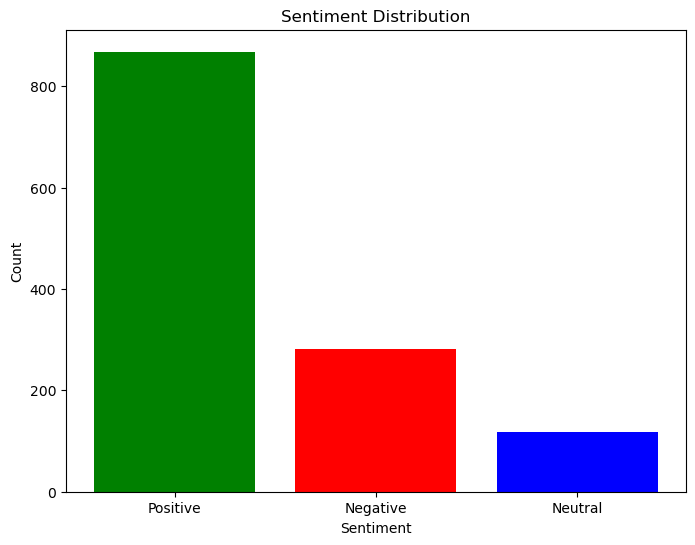

In [38]:
# Create a bar chart for sentiment distribution
sentiment_counts = data['Sentiment'].value_counts()

plt.figure(figsize=(8, 6))
plt.bar(sentiment_counts.index, sentiment_counts.values, color=['green', 'red', 'blue'])
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.title('Sentiment Distribution')
plt.show()

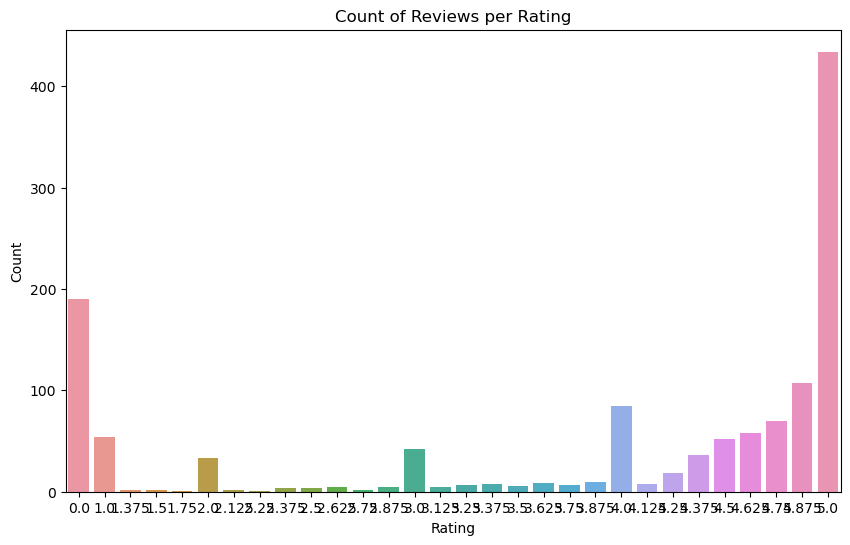

In [8]:
# Count of reviews per rating
plt.figure(figsize=(10, 6))
sns.countplot(x='Rating', data=data)
plt.title('Count of Reviews per Rating')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

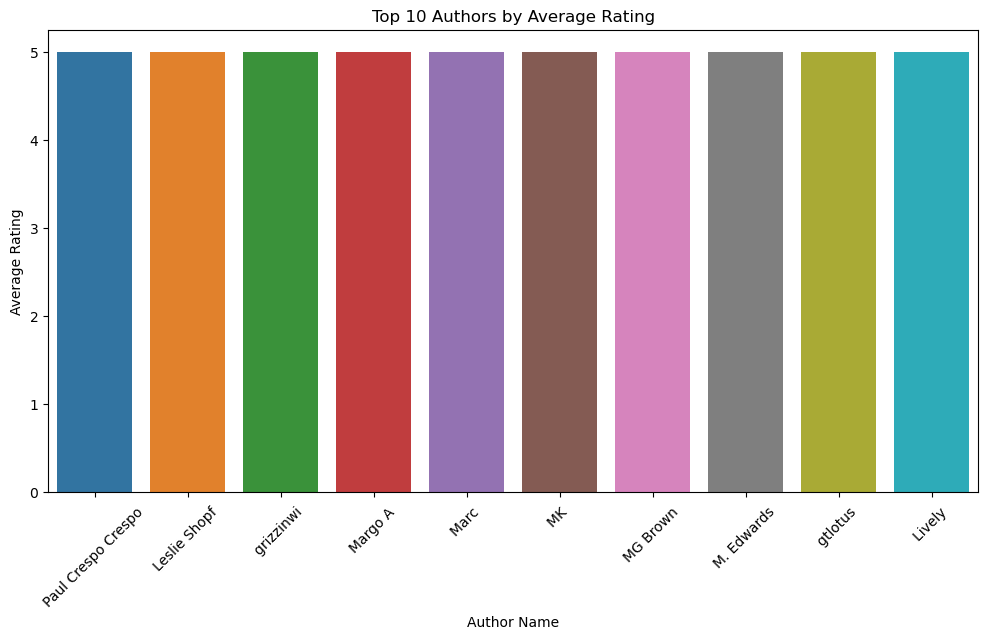

In [9]:
# Average rating distribution by author
plt.figure(figsize=(12, 6))
sns.barplot(x='Author_Name', y='Rating', data=data.groupby('Author_Name')['Rating'].mean().reset_index().sort_values(by='Rating', ascending=False)[:10])
plt.title('Top 10 Authors by Average Rating')
plt.xlabel('Author Name')
plt.ylabel('Average Rating')
plt.xticks(rotation=45)
plt.show()

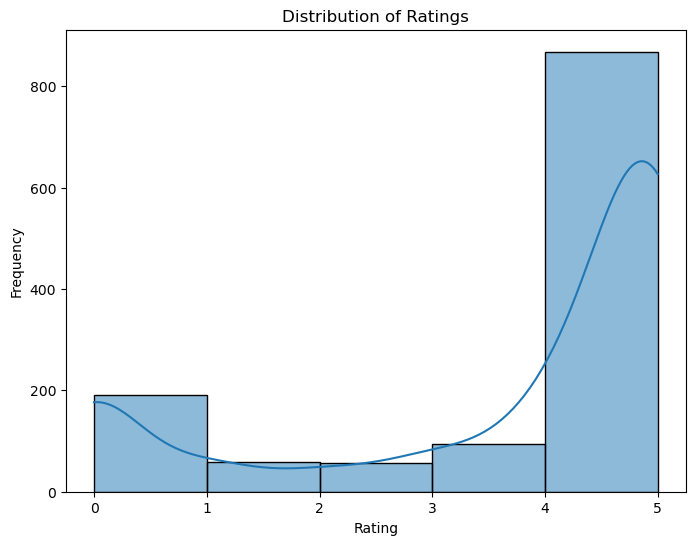

In [10]:
# Distribution of ratings
plt.figure(figsize=(8, 6))
sns.histplot(data['Rating'], bins=5, kde=True)
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

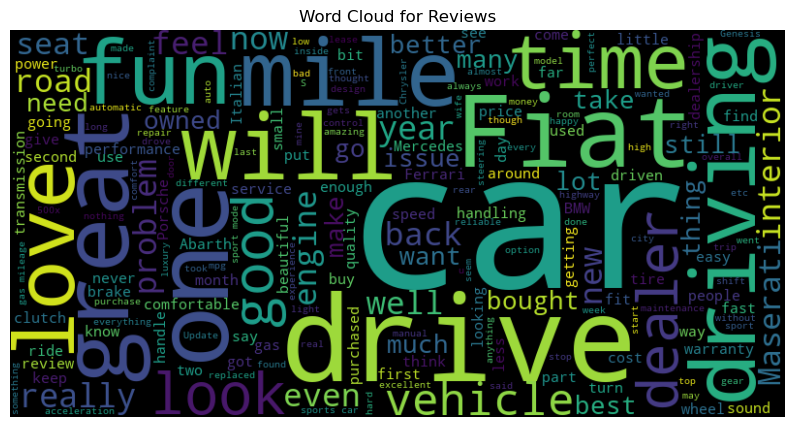

In [42]:
# Convert 'Review' column to strings and concatenate all review texts into a single string
reviews_text = ' '.join(data['Review'].astype(str))

# Create a WordCloud object
wordcloud = WordCloud(width=800, height=400, background_color='black').generate(reviews_text)

# Plot the WordCloud image
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Hide axis
plt.title('Word Cloud for Reviews')
plt.show()

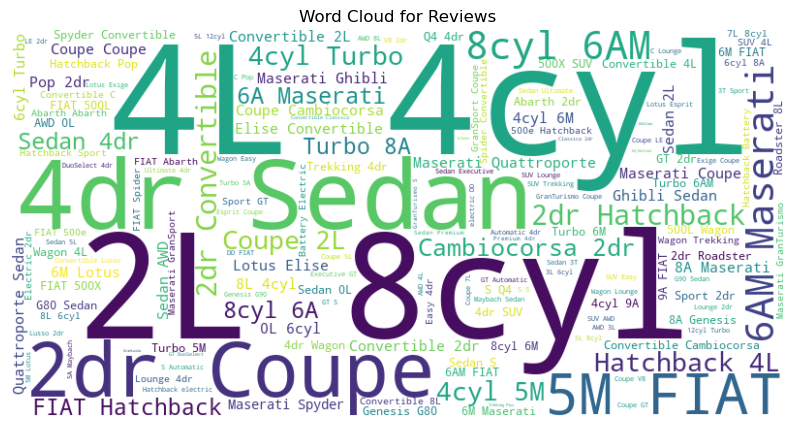

In [43]:
# Convert 'Review' column to strings and concatenate all review texts into a single string
reviews_text = ' '.join(data['Vehicle_Title'].astype(str))

# Create a WordCloud object
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(reviews_text)

# Plot the WordCloud image
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Hide axis
plt.title('Word Cloud for Reviews')
plt.show()

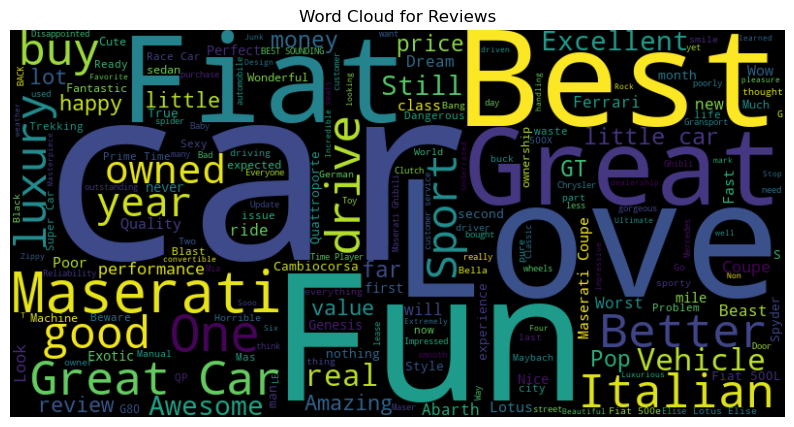

In [44]:
# Convert 'Review' column to strings and concatenate all review texts into a single string
reviews_text = ' '.join(data['Review_Title'].astype(str))

# Create a WordCloud object
wordcloud = WordCloud(width=800, height=400, background_color='black').generate(reviews_text)

# Plot the WordCloud image
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Hide axis
plt.title('Word Cloud for Reviews')
plt.show()

In [45]:
# Apply the sentiment classification function to the 'Rating' column
data['Sentiment'] = data['Rating'].apply(classify_sentiment)

# Create separate DataFrames for each sentiment
positive_reviews = data[data['Sentiment'] == 'Positive']
negative_reviews = data[data['Sentiment'] == 'Negative']
neutral_reviews = data[data['Sentiment'] == 'Neutral']

# Concatenate all review texts for each sentiment into a single string
positive_text = ' '.join(positive_reviews['Review'].astype(str))
negative_text = ' '.join(negative_reviews['Review'].astype(str))
neutral_text = ' '.join(neutral_reviews['Review'].astype(str))

# Create WordCloud objects for each sentiment
positive_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(positive_text)
negative_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(negative_text)
neutral_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(neutral_text)

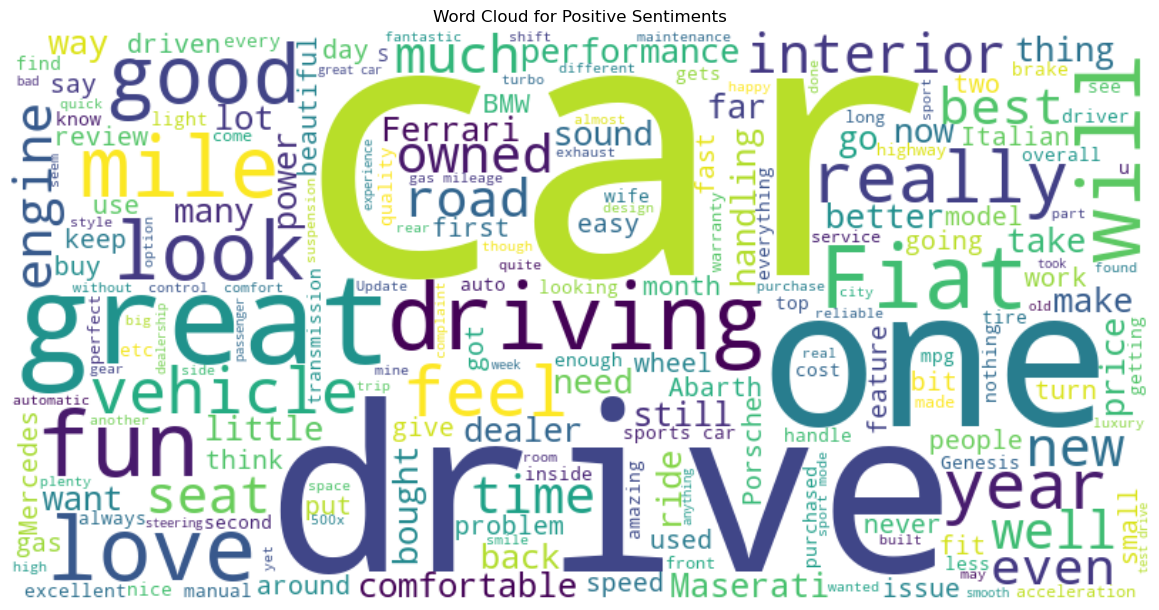

In [48]:
# Plot the WordClouds for each sentiment
plt.figure(figsize=(50, 30))

plt.subplot(131)
plt.imshow(positive_wordcloud, interpolation='bilinear')
plt.title('Word Cloud for Positive Sentiments')
plt.axis('off')
plt.show()

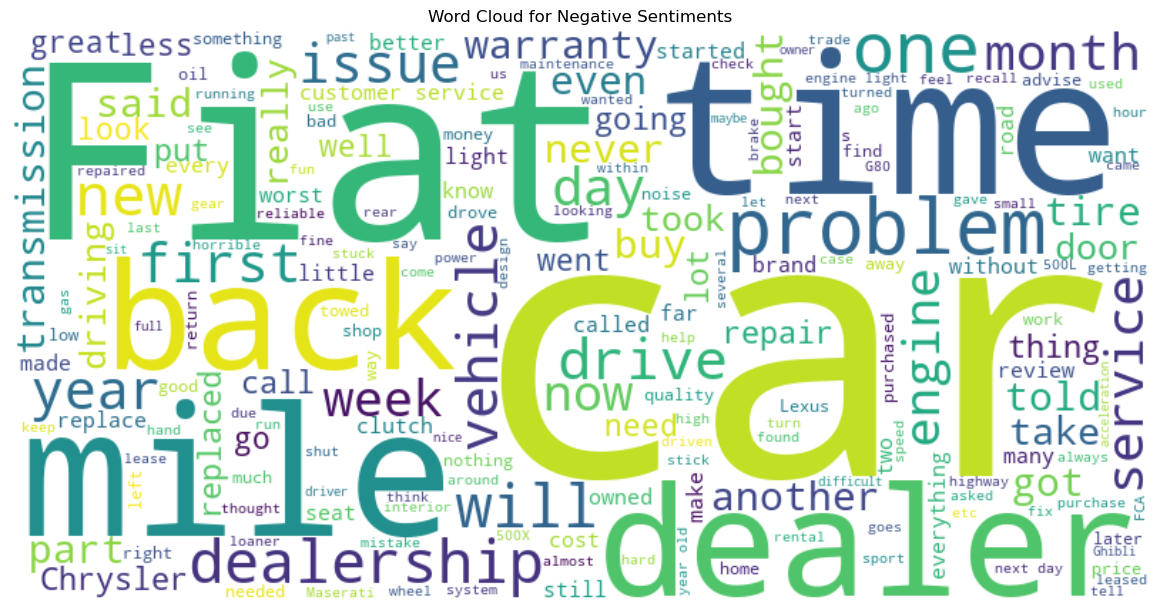

In [49]:
# Plot the WordClouds for each sentiment
plt.figure(figsize=(50, 30))
plt.subplot(132)
plt.imshow(negative_wordcloud, interpolation='bilinear')
plt.title('Word Cloud for Negative Sentiments')
plt.axis('off')
plt.show()

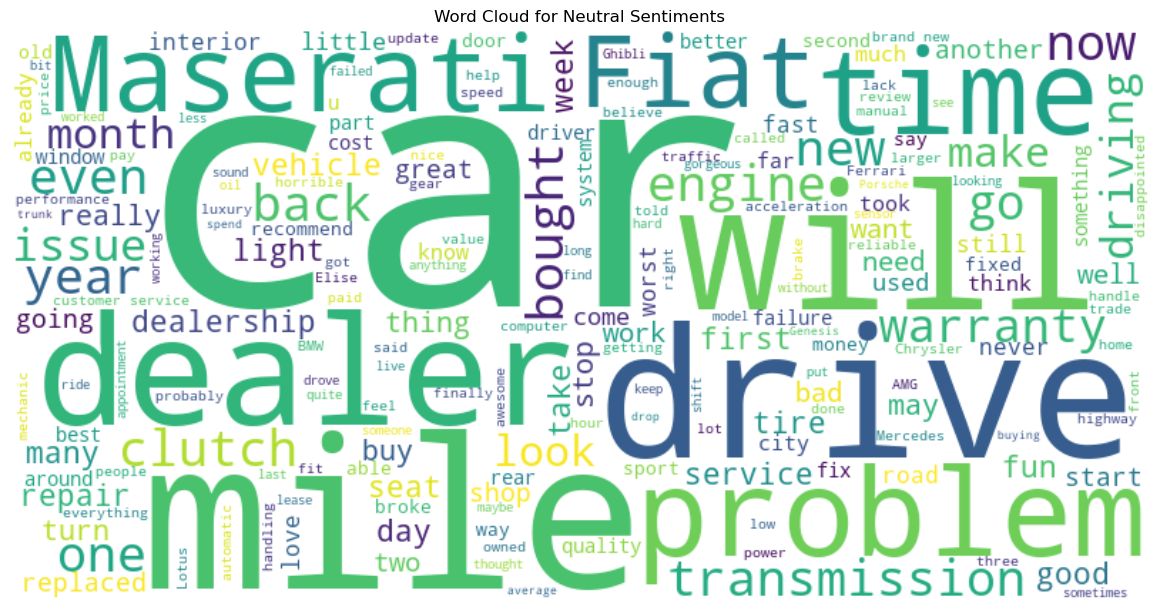

In [50]:
# Plot the WordClouds for each sentiment
plt.figure(figsize=(50, 30))
plt.subplot(133)
plt.imshow(neutral_wordcloud, interpolation='bilinear')
plt.title('Word Cloud for Neutral Sentiments')
plt.axis('off')
plt.show()

# Text Data Preprocessing

In [11]:
stopwords = stopwords.words('english')
unnecessary_stopwords = {'no', 'nor', 'not', 'ain', 'aren', "aren't", 'couldn', 'what', 'which', 'who',
                         'whom',
                         'why', 'how', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn', "hadn't",
                         'hasn',
                         "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn',
                         "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn',
                         "wasn't",
                         'weren', "weren't", 'won', "won't", 'wouldn', "wouldn't", 'don', "don't"}

stopwords = [word for word in stopwords if word not in unnecessary_stopwords]
lemma = WordNetLemmatizer()
nouns = ['NN', 'NNS']  # Using NLTK's part-of-speech tags for nouns
labelencoder = LabelEncoder()

In [12]:
# Define a function to clean the text
def text_cleaner(text, remove_stopwords=True, lemmatize=True):
    import nltk  # Import nltk here
    
    tokens = nltk.word_tokenize(text)  # Use nltk.word_tokenize instead of word_tokenize
    if lemmatize:
        lemmatizer = nltk.WordNetLemmatizer()
        tokens = [lemmatizer.lemmatize(token) for token in tokens]
    if remove_stopwords:
        tokens = [token for token in tokens if token.lower() not in nltk.corpus.stopwords.words('english')]
    cleaned_text = " ".join(tokens)
    return cleaned_text

    # Removing unnecessary stopwords
    if remove_stopwords:
        text = word_tokenize(text)
        text = " ".join([word for word in text if word not in stopwords.words('english')])

    # Word lemmatization
    if lemmatize:
        lemmatizer = WordNetLemmatizer()
        text = word_tokenize(text)
        text = " ".join([lemmatizer.lemmatize(word).lower() for word in text if lemmatizer.lemmatize(word).isalpha()])

    return text


In [13]:
def custom_vectorize(x_train, x_test, use_char=False, max_features=10000, ngram_range=(1, 1)):
    if use_char:
        vectorizer = CountVectorizer(analyzer='char', max_features=max_features, ngram_range=ngram_range)
    else:
        vectorizer = CountVectorizer(analyzer='word', token_pattern=r'\w{1,}', max_features=max_features, ngram_range=ngram_range)
    
    vectorizer.fit(x_train)
    
    count_x_train = vectorizer.transform(x_train)
    count_x_test = vectorizer.transform(x_test)
    
    return count_x_train, count_x_test

In [14]:
def custom_tfidf_vectorize(x_train, x_test, use_char=False, max_features=10000, ngram_range=(1, 1)):
    if use_char:
        vectorizer = TfidfVectorizer(analyzer='char', max_features=max_features, ngram_range=ngram_range)
    else:
        vectorizer = TfidfVectorizer(analyzer='word', token_pattern=r'\w{1,}', max_features=max_features, ngram_range=ngram_range)
    
    vectorizer.fit(x_train)
    
    x_train_tfidf = vectorizer.transform(x_train)
    x_test_tfidf = vectorizer.transform(x_test)
    
    return x_train_tfidf, x_test_tfidf


In [15]:
# Define the preprocess_text function
def preprocess_text(text, remove_stopwords=True, lemmatize=True):
    cleaned_text = text_cleaner(str(text), remove_stopwords=remove_stopwords, lemmatize=lemmatize)
    return cleaned_text

In [16]:
def prepare_data(data, test_size=0.3, remove_stopwords=True, lemmatize=True, min_class_count=2):
    data = data.sample(frac=1).reset_index(drop=True)
    descriptions = data['Review'].apply(preprocess_text, remove_stopwords=remove_stopwords, lemmatize=lemmatize)
    labels = data['Review_Title'].values.tolist()
    encoded_labels = labelencoder.fit_transform(labels)
    
    # Calculate the class counts
    class_counts = np.bincount(encoded_labels)
    
    # Identify classes with sufficient instances
    valid_classes = np.where(class_counts >= min_class_count)[0]
    
    # Filter data for valid classes
    valid_indices = [i for i in range(len(encoded_labels)) if encoded_labels[i] in valid_classes]
    descriptions = descriptions[valid_indices]
    encoded_labels = encoded_labels[valid_indices]
    
    # Create a dictionary to store descriptions for each class
    class_descriptions_dict = {class_idx: [] for class_idx in valid_classes}
    for i, class_idx in enumerate(encoded_labels):
        class_descriptions_dict[class_idx].append(descriptions.iloc[i])
    
    # Split the data into training and test sets
    x_train, y_train, x_test, y_test = [], [], [], []
    for class_idx, class_descriptions in class_descriptions_dict.items():
        num_instances_in_test = int(len(class_descriptions) * test_size)
        
        # Shuffle the instances for this class
        class_descriptions = shuffle(class_descriptions, random_state=42)
        
        # Split into training and test sets
        x_train.extend(class_descriptions[num_instances_in_test:])
        y_train.extend([class_idx] * (len(class_descriptions) - num_instances_in_test))
        x_test.extend(class_descriptions[:num_instances_in_test])
        y_test.extend([class_idx] * num_instances_in_test)
    
    return x_train, x_test, y_train, y_test

# Now you can use the prepare_data function
x_train, x_test, y_train, y_test = prepare_data(data, test_size=0.3, remove_stopwords=True, lemmatize=True)

print("Total training examples: ", len(x_train))
print("Total test examples: ", len(x_test))

Total training examples:  614
Total test examples:  53


## SVM

In [17]:
# Vectorize your text data using TF-IDF
tfidf_vectorizer = TfidfVectorizer(max_features=10000)
x_train_tfidf = tfidf_vectorizer.fit_transform(x_train)
x_test_tfidf = tfidf_vectorizer.transform(x_test)

# Initialize and train the SVM model
svm_model = SVC(kernel='linear', C=1.0)
svm_model.fit(x_train_tfidf, y_train)

# Make predictions on the test set
y_pred = svm_model.predict(x_test_tfidf)

In [18]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Classification Report:")
print(classification_rep)

Accuracy: 1.0
Classification Report:
              precision    recall  f1-score   support

          11       1.00      1.00      1.00        46
          92       1.00      1.00      1.00         1
         158       1.00      1.00      1.00         1
         347       1.00      1.00      1.00         2
         359       1.00      1.00      1.00         1
         481       1.00      1.00      1.00         1
         780       1.00      1.00      1.00         1

    accuracy                           1.00        53
   macro avg       1.00      1.00      1.00        53
weighted avg       1.00      1.00      1.00        53



## Naive Bayes

In [19]:
# Vectorize your text data using CountVectorizer
count_vectorizer = CountVectorizer(max_features=10000)
x_train_count = count_vectorizer.fit_transform(x_train)
x_test_count = count_vectorizer.transform(x_test)

# Initialize and train the Naive Bayes model
naive_bayes_model = MultinomialNB()
naive_bayes_model.fit(x_train_count, y_train)

# Make predictions on the test set
y_pred = naive_bayes_model.predict(x_test_count)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Classification Report:")
print(classification_rep)

Accuracy: 0.9622641509433962
Classification Report:
              precision    recall  f1-score   support

          11       0.98      1.00      0.99        46
          92       0.00      0.00      0.00         1
         158       1.00      1.00      1.00         1
         347       1.00      1.00      1.00         2
         359       0.00      0.00      0.00         1
         481       0.50      1.00      0.67         1
         780       1.00      1.00      1.00         1

    accuracy                           0.96        53
   macro avg       0.64      0.71      0.67        53
weighted avg       0.93      0.96      0.95        53



## RNN

In [20]:
# Tokenize the text data
max_words = 10000
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(x_train)

x_train_seq = tokenizer.texts_to_sequences(x_train)
x_test_seq = tokenizer.texts_to_sequences(x_test)

# Pad sequences for uniform input length
max_seq_length = 100  # Adjust as needed
x_train_pad = pad_sequences(x_train_seq, maxlen=max_seq_length, padding='post')
x_test_pad = pad_sequences(x_test_seq, maxlen=max_seq_length, padding='post')

# Convert labels to one-hot encoding
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

num_classes = len(np.unique(y_train_encoded))

# Build the RNN model
model = Sequential()
model.add(Embedding(input_dim=max_words, output_dim=128, input_length=max_seq_length))
model.add(LSTM(64, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
batch_size = 32
epochs = 10
model.fit(x_train_pad, y_train_encoded, batch_size=batch_size, epochs=epochs, validation_split=0.2)

Epoch 1/10
16/16 [==============================] - 6s 191ms/step - loss: 5.4172 - accuracy: 0.1996 - val_loss: 5.6771 - val_accuracy: 0.0000e+00
Epoch 2/10
16/16 [==============================] - 2s 153ms/step - loss: 4.8860 - accuracy: 0.2220 - val_loss: 6.7545 - val_accuracy: 0.0000e+00
Epoch 3/10
16/16 [==============================] - 2s 149ms/step - loss: 4.7175 - accuracy: 0.2220 - val_loss: 7.2952 - val_accuracy: 0.0000e+00
Epoch 4/10
16/16 [==============================] - 2s 150ms/step - loss: 4.6517 - accuracy: 0.2220 - val_loss: 7.5842 - val_accuracy: 0.0000e+00
Epoch 5/10
16/16 [==============================] - 3s 157ms/step - loss: 4.6279 - accuracy: 0.2220 - val_loss: 7.9906 - val_accuracy: 0.0000e+00
Epoch 6/10
16/16 [==============================] - 2s 155ms/step - loss: 4.6112 - accuracy: 0.2220 - val_loss: 8.0708 - val_accuracy: 0.0000e+00
Epoch 7/10
16/16 [==============================] - 3s 163ms/step - loss: 4.6034 - accuracy: 0.2220 - val_loss: 8.2511 - val

In [21]:
# Evaluate the model
y_pred_probs = model.predict(x_test_pad)
y_pred_encoded = np.argmax(y_pred_probs, axis=1)
y_pred = label_encoder.inverse_transform(y_pred_encoded)

accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Classification Report:")
print(classification_rep)

2/2 [==============================] - 1s 26ms/step
Accuracy: 0.8679245283018868
Classification Report:
              precision    recall  f1-score   support

          11       0.87      1.00      0.93        46
          92       0.00      0.00      0.00         1
         158       0.00      0.00      0.00         1
         347       0.00      0.00      0.00         2
         359       0.00      0.00      0.00         1
         481       0.00      0.00      0.00         1
         780       0.00      0.00      0.00         1

    accuracy                           0.87        53
   macro avg       0.12      0.14      0.13        53
weighted avg       0.75      0.87      0.81        53



### Transformer Model

## 

In [22]:
!pip install transformers

In [23]:
# Convert labels to numerical values (0, 1, ...)
labels = np.unique(y_train, return_inverse=True)[1]

# Split data for validation
x_train, x_val, y_train, y_val = train_test_split(x_train, labels, test_size=0.2, random_state=42)

# Load BERT tokenizer and model
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=len(np.unique(labels)))

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [24]:
# Tokenize the input data
train_encodings = tokenizer(x_train, padding=True, truncation=True, max_length=128, return_tensors='pt')
val_encodings = tokenizer(x_val, padding=True, truncation=True, max_length=128, return_tensors='pt')
test_encodings = tokenizer(x_test, padding=True, truncation=True, max_length=128, return_tensors='pt')

# Prepare PyTorch DataLoader
train_dataset = torch.utils.data.TensorDataset(train_encodings['input_ids'], train_encodings['attention_mask'], torch.tensor(y_train))
val_dataset = torch.utils.data.TensorDataset(val_encodings['input_ids'], val_encodings['attention_mask'], torch.tensor(y_val))
test_dataset = torch.utils.data.TensorDataset(test_encodings['input_ids'], test_encodings['attention_mask'])

train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = torch.utils.data.DataLoader(val_dataset, batch_size=32)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=32)

In [25]:
# Define training loop
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)
optimizer = AdamW(model.parameters(), lr=1e-5)

In [29]:
num_epochs = 5

# Move the model to the device
model.to(device)

for epoch in range(num_epochs):
    model.train()
    for batch in train_loader:
        input_ids, attention_mask, labels = [item.to(device) for item in batch]
        
        optimizer.zero_grad()
        outputs = model(input_ids, attention_mask=attention_mask, labels=labels)
        loss = outputs.loss
        loss.backward()
        optimizer.step()

    model.eval()
    val_preds = []
    with torch.no_grad():
        for batch in val_loader:
            input_ids, attention_mask, labels = [item.to(device) for item in batch]
            
            outputs = model(input_ids, attention_mask=attention_mask)
            logits = outputs.logits
            preds = torch.argmax(logits, dim=1)
            val_preds.extend(preds.cpu().numpy())
    
    val_accuracy = accuracy_score(y_val, val_preds)
    print(f'Epoch {epoch+1}: Validation Accuracy = {val_accuracy:.4f}')

Epoch 1: Validation Accuracy = 0.2033
Epoch 2: Validation Accuracy = 0.2033
Epoch 3: Validation Accuracy = 0.1951
Epoch 4: Validation Accuracy = 0.2033
Epoch 5: Validation Accuracy = 0.2033


In [30]:
# Make predictions on the test set
test_preds = []
model.eval()
with torch.no_grad():
    for batch in test_loader:
        input_ids, attention_mask = batch
        input_ids, attention_mask = input_ids.to(device), attention_mask.to(device)
        
        outputs = model(input_ids, attention_mask=attention_mask)
        logits = outputs.logits
        preds = torch.argmax(logits, dim=1)
        test_preds.extend(preds.cpu().numpy())

# Convert numerical labels back to original labels
test_preds = np.array(test_preds)
test_labels = np.unique(y_train)[test_preds]

In [31]:
# Evaluate the model
test_accuracy = accuracy_score(y_test, test_labels)
classification_rep = classification_report(y_test, test_labels)

print("Test Accuracy:", test_accuracy)
print("Classification Report:")
print(classification_rep)

Test Accuracy: 0.0
Classification Report:
              precision    recall  f1-score   support

           4       0.00      0.00      0.00       0.0
           6       0.00      0.00      0.00       0.0
          11       0.00      0.00      0.00      46.0
          92       0.00      0.00      0.00       1.0
         132       0.00      0.00      0.00       0.0
         158       0.00      0.00      0.00       1.0
         347       0.00      0.00      0.00       2.0
         359       0.00      0.00      0.00       1.0
         481       0.00      0.00      0.00       1.0
         780       0.00      0.00      0.00       1.0

    accuracy                           0.00      53.0
   macro avg       0.00      0.00      0.00      53.0
weighted avg       0.00      0.00      0.00      53.0

